In [154]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
# Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)
car_info_df = pd.read_csv("CarPrice_Assignment.csv")
car_info_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [155]:
# Data Understanding and Cleaning

# Dropping duplicate rows if there are any
car_info_df = car_info_df.drop_duplicates()

# Convert all character columns to lower case for standardisation
def convert_to_lower_case(x):
    try:
        return x.lower()
    except:
        return x
car_info_df = car_info_df.applymap(convert_to_lower_case)

# Extract company name from carname
car_info_df['Company'] = car_info_df['CarName'].apply(lambda x : x.split()[0].lower())

# Correct spellings for car company
car_correcct_names_mapping = {'maxda':'mazda', 'porcshce':'porsche', 'toyouta':'toyota', 'vokswagen':'volkswagen','vw':'volkswagen'}
car_info_df['Company'] = car_info_df['Company'].replace(car_correcct_names_mapping)
car_info_df.head()

# Dropping car_ID and CarName since we will not be requiring those columns
car_info_df = car_info_df.drop('CarName',axis=1)
car_info_df = car_info_df.drop('car_ID',axis=1)
car_info_df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


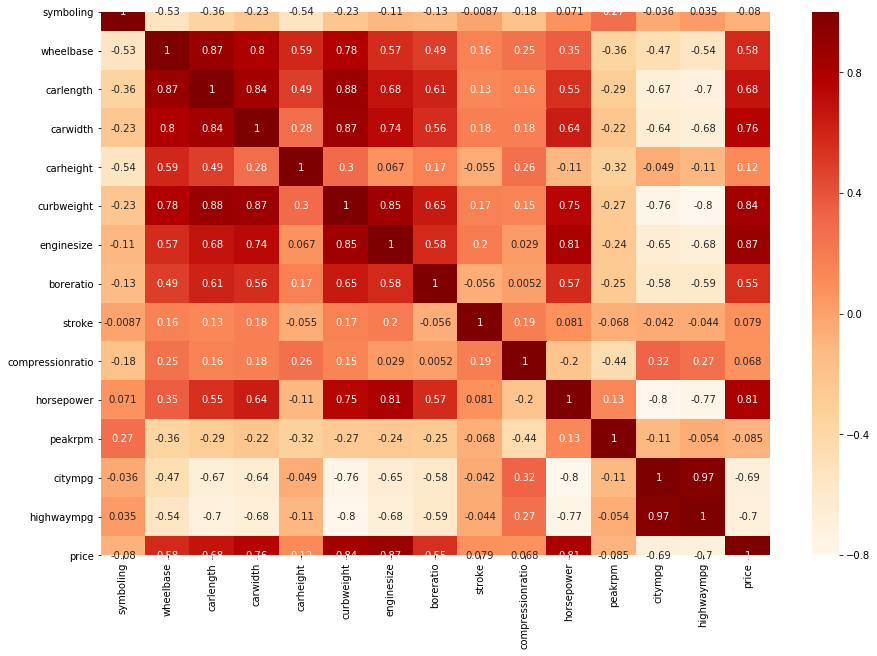

In [156]:
# Data Analysis
plt.figure(figsize = (15,10))
sns.heatmap(car_info_df.corr(), annot = True, cmap="OrRd")
plt.show()

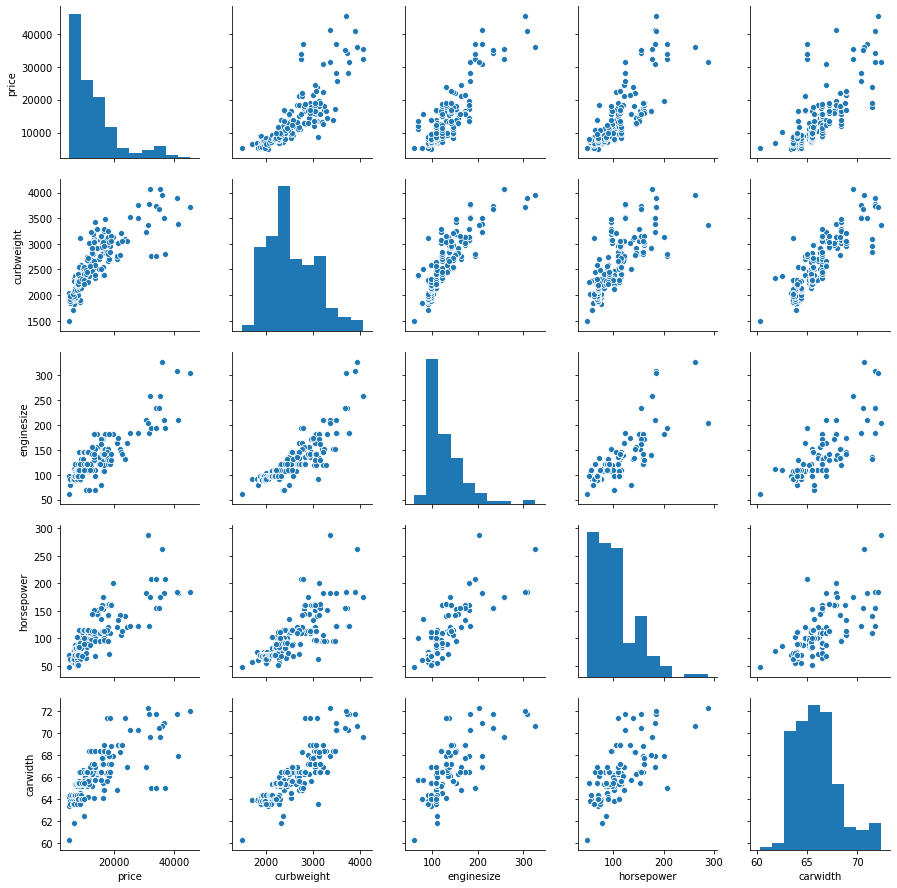

In [157]:
sns.pairplot(car_info_df[['price','curbweight','enginesize','horsepower','carwidth']])
plt.show()

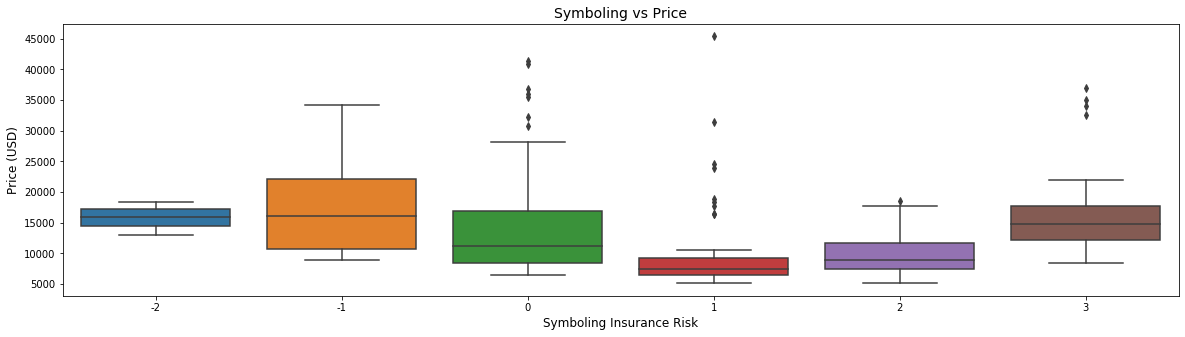

In [158]:
plt.figure(figsize=(20,5))
ax = sns.boxplot(data=car_info_df,x='symboling',y='price')
ax.set_title('Symboling vs Price',fontsize=14)
ax.set_xlabel('Symboling Insurance Risk',fontsize=12)
ax.set_ylabel('Price (USD)',fontsize=12)
plt.show()

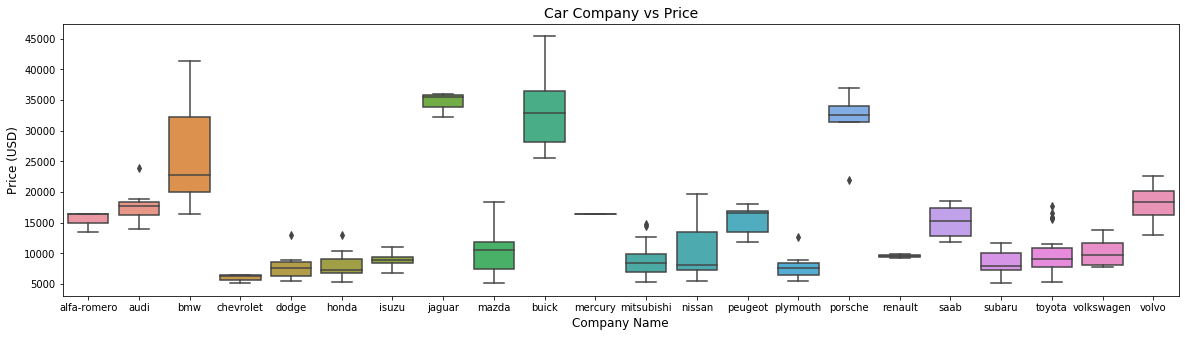

In [159]:
plt.figure(figsize=(20,5))
ax = sns.boxplot(data=car_info_df,x='Company',y='price')
ax.set_title('Car Company vs Price',fontsize=14)
ax.set_xlabel('Company Name',fontsize=12)
ax.set_ylabel('Price (USD)',fontsize=12)
plt.show()

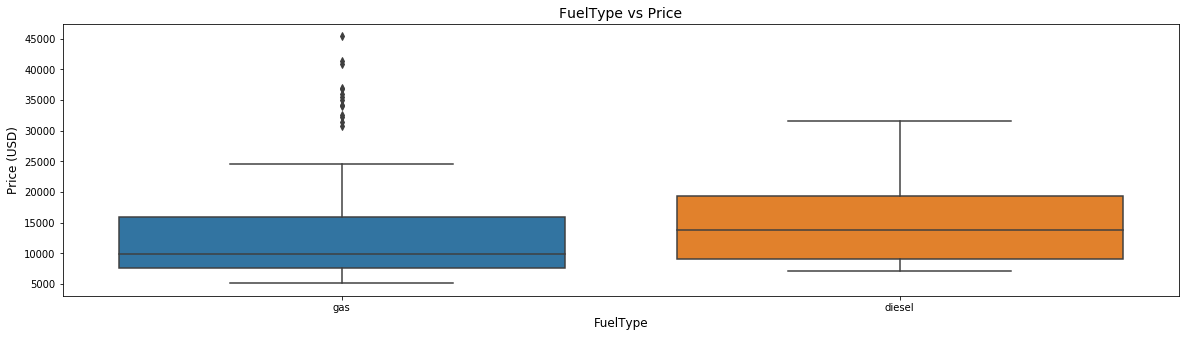

In [160]:
plt.figure(figsize=(20,5))
ax = sns.boxplot(data=car_info_df,x='fueltype',y='price')
ax.set_title('FuelType vs Price',fontsize=14)
ax.set_xlabel('FuelType',fontsize=12)
ax.set_ylabel('Price (USD)',fontsize=12)
plt.show()

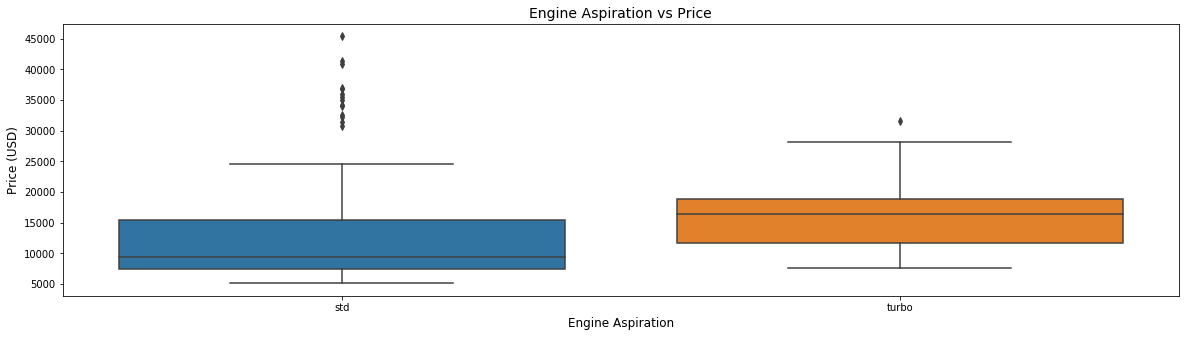

In [161]:
plt.figure(figsize=(20,5))
ax = sns.boxplot(data=car_info_df,x='aspiration',y='price')
ax.set_title('Engine Aspiration vs Price',fontsize=14)
ax.set_xlabel('Engine Aspiration',fontsize=12)
ax.set_ylabel('Price (USD)',fontsize=12)
plt.show()

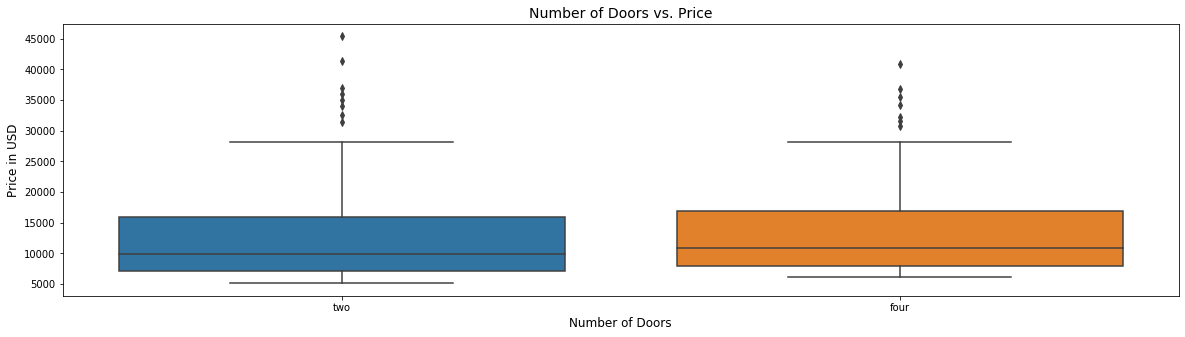

In [162]:
plt.figure(figsize=(20,5))
ax = sns.boxplot(data=car_info_df,x='doornumber',y='price')
ax.set_title('Number of Doors vs. Price',fontsize=14)
ax.set_xlabel('Number of Doors',fontsize=12)
ax.set_ylabel('Price in USD',fontsize=12)
plt.show()

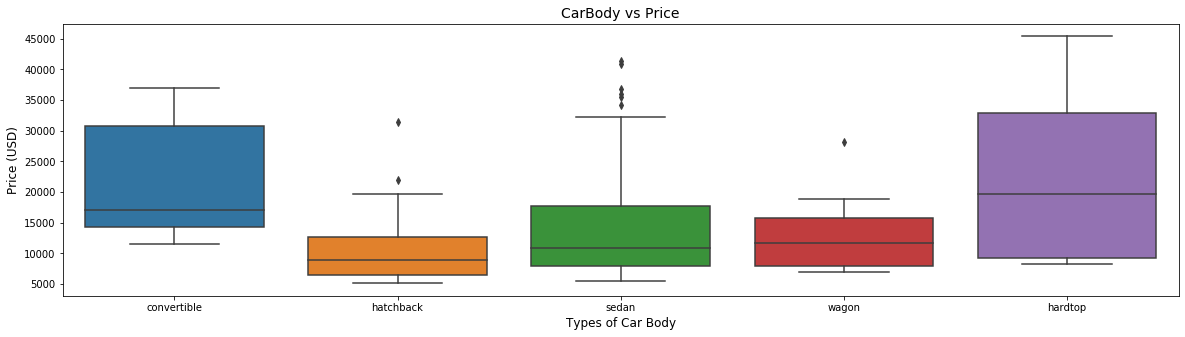

In [163]:
plt.figure(figsize=(20,5))
ax = sns.boxplot(data=car_info_df,x='carbody',y='price')
ax.set_title('CarBody vs Price',fontsize=14)
ax.set_xlabel('Types of Car Body',fontsize=12)
ax.set_ylabel('Price (USD)',fontsize=12)
plt.show()

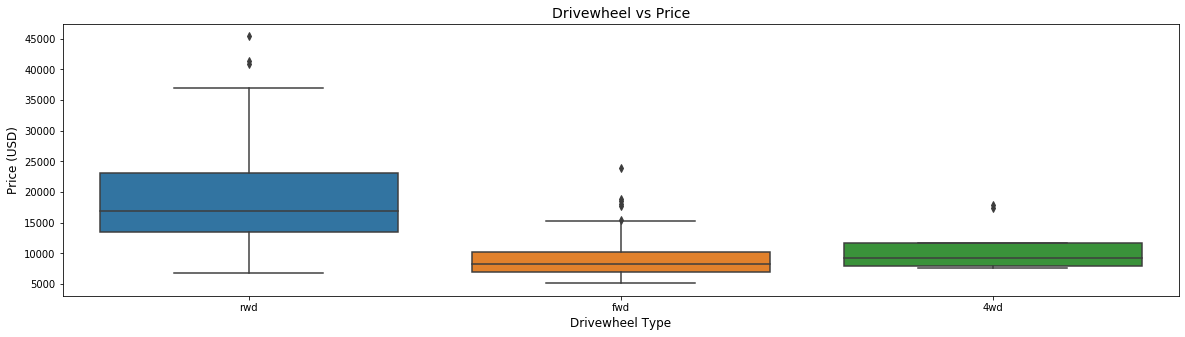

In [164]:
plt.figure(figsize=(20,5))
ax = sns.boxplot(data=car_info_df,x='drivewheel',y='price')
ax.set_title('Drivewheel vs Price',fontsize=14)
ax.set_xlabel('Drivewheel Type',fontsize=12)
ax.set_ylabel('Price (USD)',fontsize=12)
plt.show()

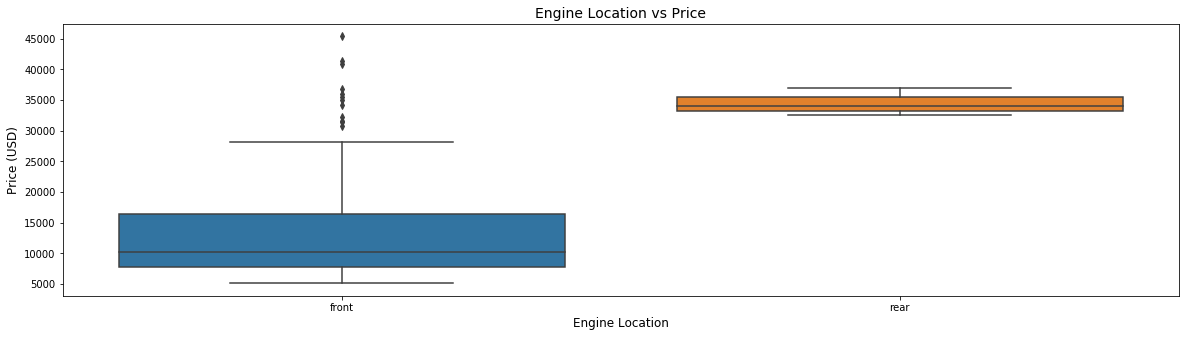

In [165]:
plt.figure(figsize=(20,5))
ax = sns.boxplot(data=car_info_df,x='enginelocation',y='price')
ax.set_title('Engine Location vs Price',fontsize=14)
ax.set_xlabel('Engine Location',fontsize=12)
ax.set_ylabel('Price (USD)',fontsize=12)
plt.show()

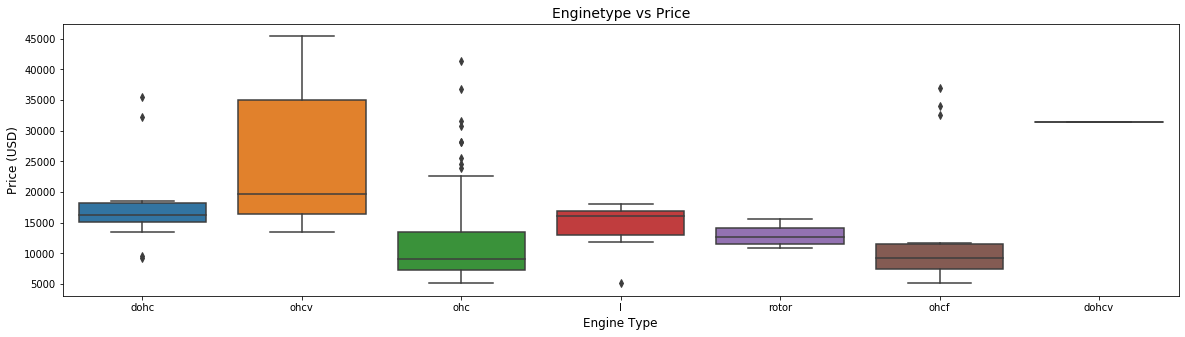

In [166]:
plt.figure(figsize=(20,5))
ax = sns.boxplot(data=car_info_df,x='enginetype',y='price')
ax.set_title('Enginetype vs Price',fontsize=14)
ax.set_xlabel('Engine Type',fontsize=12)
ax.set_ylabel('Price (USD)',fontsize=12)
plt.show()

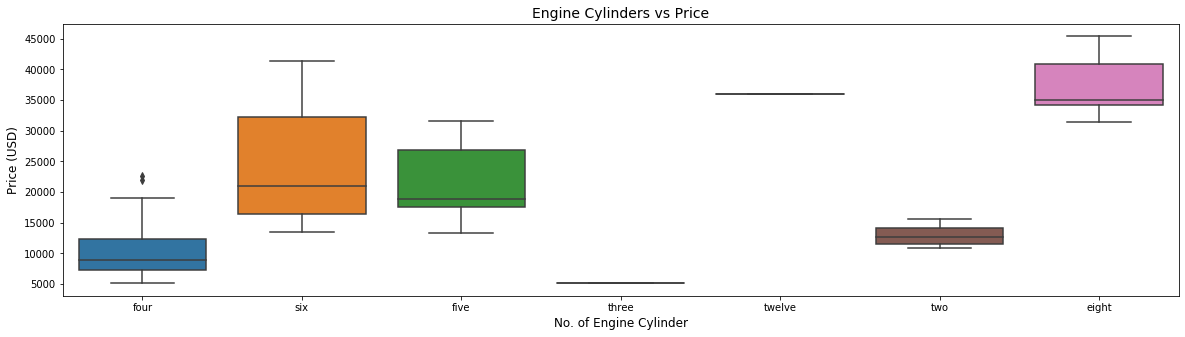

In [167]:
plt.figure(figsize=(20,5))
ax = sns.boxplot(data=car_info_df,x='cylindernumber',y='price')
ax.set_title('Engine Cylinders vs Price',fontsize=14)
ax.set_xlabel('No. of Engine Cylinder',fontsize=12)
ax.set_ylabel('Price (USD)',fontsize=12)
plt.show()

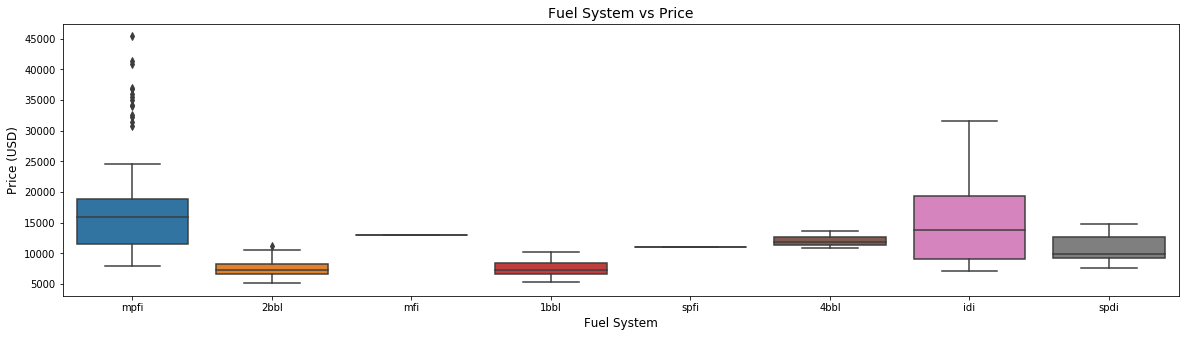

In [168]:
plt.figure(figsize=(20,5))
ax = sns.boxplot(data=car_info_df,x='fuelsystem',y='price')
ax.set_title('Fuel System vs Price',fontsize=14)
ax.set_xlabel('Fuel System',fontsize=12)
ax.set_ylabel('Price (USD)',fontsize=12)
plt.show()

In [169]:
car_info_df['fueltype_d'] = np.where(car_info_df['fueltype'].str.contains('gas'), 1, 0)
car_info_df['aspiration_d'] = np.where(car_info_df['aspiration'].str.contains('std'), 1, 0)
car_info_df['doornumber_d'] = np.where(car_info_df['doornumber'].str.contains('two'), 1, 0)
car_info_df['enginelocation_d'] = np.where(car_info_df['enginelocation'].str.contains('front'), 1, 0)

#Create dummies
status = pd.get_dummies(car_info_df['Company'],drop_first = True,prefix='company')
car_info_df = pd.concat([car_info_df, status], axis = 1)
status = pd.get_dummies(car_info_df['symboling'],drop_first=True,prefix='symboling')
car_info_df = pd.concat([car_info_df, status], axis = 1)
status = pd.get_dummies(car_info_df['carbody'],drop_first=True,prefix='carbody')
car_info_df = pd.concat([car_info_df, status], axis = 1)
status = pd.get_dummies(car_info_df['drivewheel'],drop_first=True,prefix='drivewheel')
car_info_df = pd.concat([car_info_df, status], axis = 1)
status = pd.get_dummies(car_info_df['enginetype'],drop_first=True,prefix='enginetype')
car_info_df = pd.concat([car_info_df, status], axis = 1)
status = pd.get_dummies(car_info_df['cylindernumber'],drop_first=True,prefix='cylindernumber')
car_info_df = pd.concat([car_info_df, status], axis = 1)
status = pd.get_dummies(car_info_df['fuelsystem'],drop_first=True,prefix='carfuelsystem')
car_info_df = pd.concat([car_info_df, status], axis = 1)

# Drop the original columns on which dummies has been created
cols_to_drop = ['Company','symboling','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','fuelsystem','cylindernumber']
car_info_df = car_info_df.drop(cols_to_drop,axis=1)
car_info_df.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_d,aspiration_d,doornumber_d,enginelocation_d,company_audi,company_bmw,company_buick,company_chevrolet,company_dodge,company_honda,company_isuzu,company_jaguar,company_mazda,company_mercury,company_mitsubishi,company_nissan,company_peugeot,company_plymouth,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_volkswagen,company_volvo,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,carfuelsystem_2bbl,carfuelsystem_4bbl,carfuelsystem_idi,carfuelsystem_mfi,carfuelsystem_mpfi,carfuelsystem_spdi,carfuelsystem_spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


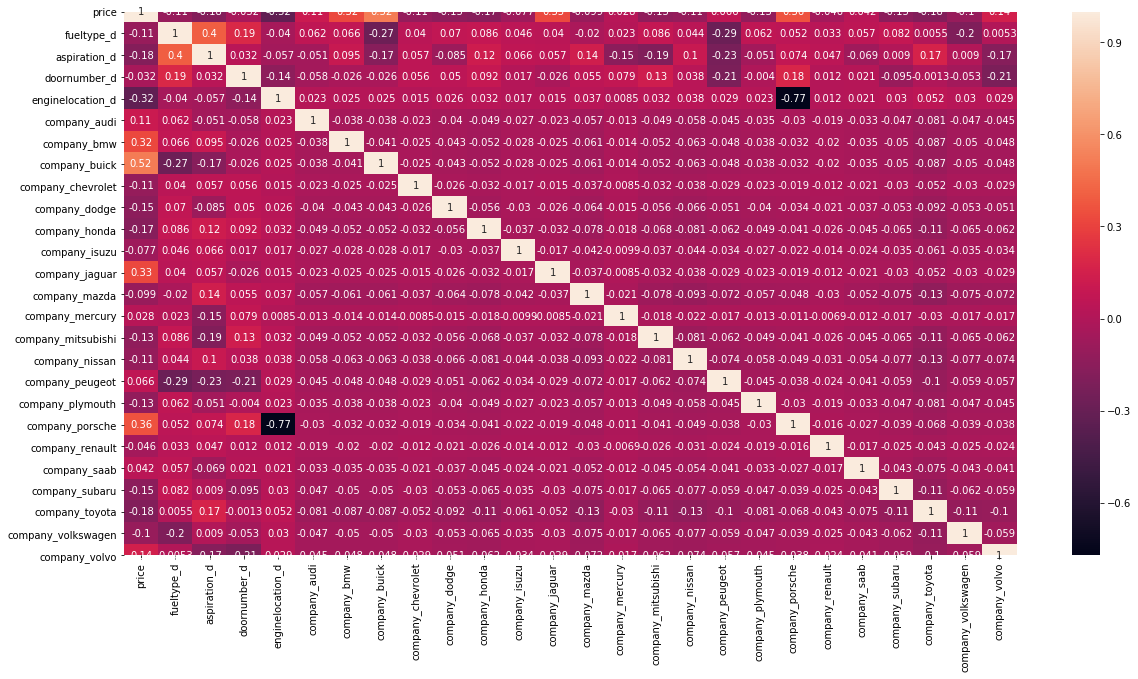

In [170]:
plt.figure(figsize = (20, 10))
sns.heatmap(car_info_df.loc[:,'price':'company_volvo'].corr(), annot = True)
plt.show()

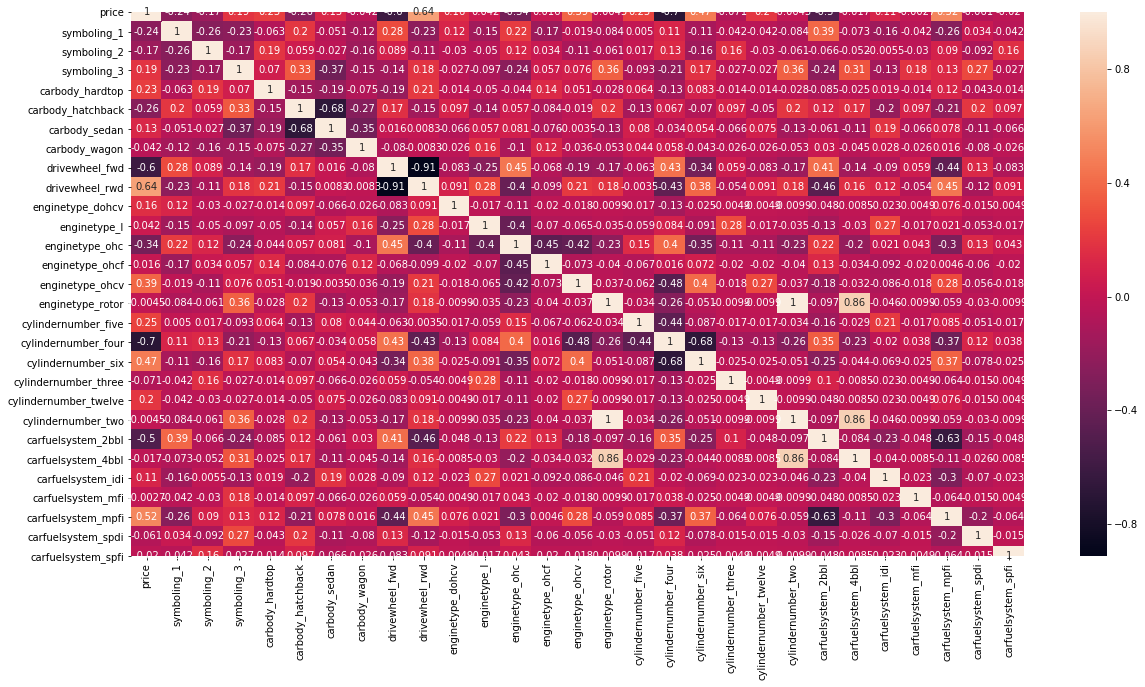

In [171]:
plt.figure(figsize = (20, 10))
sns.heatmap(pd.concat([car_info_df[['price']],car_info_df.loc[:,'symboling_1':]],axis=1).corr(), annot = True)
plt.show()

In [197]:
#Model Building
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(car_info_df, train_size = 0.7, test_size = 0.3, random_state = 100)
df_train.head()

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the binary and 'dummy' variables
df_train.loc[:,'wheelbase':'price'] = scaler.fit_transform(df_train.loc[:,'wheelbase':'price'])

print (df_train.head())

# Divide into X and Y sets for model building
y_train = df_train.pop('price')
X_train = df_train

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10) # running RFE
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))
# Columns selected by RFE
col = X_train.columns[rfe.support_]
col

# Columns rejected by RFE
X_train.columns[~rfe.support_]

# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe.head()

     wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
122   0.244828   0.426016  0.291667   0.265487    0.272692    0.139623   
125   0.272414   0.452033  0.666667   0.212389    0.500388    0.339623   
166   0.272414   0.448780  0.308333   0.424779    0.314973    0.139623   
1     0.068966   0.450407  0.316667   0.088496    0.411171    0.260377   
199   0.610345   0.775610  0.575000   0.858407    0.647401    0.260377   

     boreratio    stroke  compressionratio  horsepower   peakrpm   citympg  \
122   0.230159  0.525253           0.15000    0.083333  0.551020  0.500000   
125   1.000000  0.464646           0.15625    0.395833  0.551020  0.166667   
166   0.444444  0.449495           0.15000    0.266667  1.000000  0.361111   
1     0.626984  0.247475           0.12500    0.262500  0.346939  0.222222   
199   0.746032  0.484848           0.03125    0.475000  0.387755  0.111111   

     highwaympg     price  fueltype_d  aspiration_d  doornumber_d  \
122    0.567568  

,carwidth,curbweight,enginesize,boreratio,enginelocation_d,company_bmw,company_porsche,enginetype_rotor,cylindernumber_three,cylindernumber_twelve
122,0.291667,0.272692,0.139623,0.230159,1,0,0,0,0,0
125,0.666667,0.500388,0.339623,1.000000,1,0,1,0,0,0
166,0.308333,0.314973,0.139623,0.444444,1,0,0,0,0,0
1,0.316667,0.411171,0.260377,0.626984,1,0,0,0,0,0
199,0.575000,0.647401,0.260377,0.746032,1,0,0,0,0,0


In [173]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     137.1
Date:                Sat, 30 Nov 2019   Prob (F-statistic):           1.21e-64
Time:                        18:59:08   Log-Likelihood:                 190.87
No. Observations:                 143   AIC:                            -359.7
Df Residuals:                     132   BIC:                            -327.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.17

In [174]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,230.92
2,curbweight,9.26
3,enginesize,7.23
1,carwidth,4.92
4,boreratio,1.85
7,company_porsche,1.82
5,enginelocation_d,1.66
10,cylindernumber_twelve,1.49
8,enginetype_rotor,1.24
6,company_bmw,1.13


In [175]:
#Drop column cylindernumber_twelve as it is insignificant due to high p-value.
X = X_train_rfe.drop('cylindernumber_twelve', 1,)
X.head()

,const,carwidth,curbweight,enginesize,boreratio,enginelocation_d,company_bmw,company_porsche,enginetype_rotor,cylindernumber_three
122,1.0,0.291667,0.272692,0.139623,0.230159,1,0,0,0,0
125,1.0,0.666667,0.500388,0.339623,1.000000,1,0,1,0,0
166,1.0,0.308333,0.314973,0.139623,0.444444,1,0,0,0,0
1,1.0,0.316667,0.411171,0.260377,0.626984,1,0,0,0,0
199,1.0,0.575000,0.647401,0.260377,0.746032,1,0,0,0,0


In [176]:
X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     152.9
Date:                Sat, 30 Nov 2019   Prob (F-statistic):           1.18e-65
Time:                        18:59:09   Log-Likelihood:                 190.63
No. Observations:                 143   AIC:                            -361.3
Df Residuals:                     133   BIC:                            -331.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1760 

In [177]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,228.54
2,curbweight,8.64
3,enginesize,5.13
1,carwidth,4.91
4,boreratio,1.85
7,company_porsche,1.80
5,enginelocation_d,1.65
8,enginetype_rotor,1.17
6,company_bmw,1.09
9,cylindernumber_three,1.05


In [178]:
#Drop column curbweight since it has high VIF value.
X = X.drop('curbweight', 1,)
X.head()

,const,carwidth,enginesize,boreratio,enginelocation_d,company_bmw,company_porsche,enginetype_rotor,cylindernumber_three
122,1.0,0.291667,0.139623,0.230159,1,0,0,0,0
125,1.0,0.666667,0.339623,1.000000,1,0,1,0,0
166,1.0,0.308333,0.139623,0.444444,1,0,0,0,0
1,1.0,0.316667,0.260377,0.626984,1,0,0,0,0
199,1.0,0.575000,0.260377,0.746032,1,0,0,0,0


In [179]:
X_train_lm = sm.add_constant(X)
lr_3 = sm.OLS(y_train, X_train_lm).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     152.5
Date:                Sat, 30 Nov 2019   Prob (F-statistic):           2.01e-63
Time:                        18:59:09   Log-Likelihood:                 182.32
No. Observations:                 143   AIC:                            -346.6
Df Residuals:                     134   BIC:                            -320.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1849 

In [180]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,228.38
2,enginesize,3.12
1,carwidth,3.08
3,boreratio,1.70
6,company_porsche,1.67
4,enginelocation_d,1.64
7,enginetype_rotor,1.14
5,company_bmw,1.09
8,cylindernumber_three,1.05


In [181]:
X = X.drop('boreratio', 1,)
X.head()

,const,carwidth,enginesize,enginelocation_d,company_bmw,company_porsche,enginetype_rotor,cylindernumber_three
122,1.0,0.291667,0.139623,1,0,0,0,0
125,1.0,0.666667,0.339623,1,0,1,0,0
166,1.0,0.308333,0.139623,1,0,0,0,0
1,1.0,0.316667,0.260377,1,0,0,0,0
199,1.0,0.575000,0.260377,1,0,0,0,0


In [182]:
X_train_lm = sm.add_constant(X)
lr_4 = sm.OLS(y_train, X_train_lm).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     171.1
Date:                Sat, 30 Nov 2019   Prob (F-statistic):           7.04e-64
Time:                        18:59:09   Log-Likelihood:                 180.65
No. Observations:                 143   AIC:                            -345.3
Df Residuals:                     135   BIC:                            -321.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1702 

In [183]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,226.38
2,enginesize,3.02
1,carwidth,2.86
3,enginelocation_d,1.64
5,company_porsche,1.59
6,enginetype_rotor,1.13
4,company_bmw,1.09
7,cylindernumber_three,1.05


In [184]:
#Drop column company_porsche which has p-value more than 0.05
X = X.drop('company_porsche', 1,)
X.head()

,const,carwidth,enginesize,enginelocation_d,company_bmw,enginetype_rotor,cylindernumber_three
122,1.0,0.291667,0.139623,1,0,0,0
125,1.0,0.666667,0.339623,1,0,0,0
166,1.0,0.308333,0.139623,1,0,0,0
1,1.0,0.316667,0.260377,1,0,0,0
199,1.0,0.575000,0.260377,1,0,0,0


In [185]:
X_train_lm = sm.add_constant(X)
lr_5 = sm.OLS(y_train, X_train_lm).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     197.0
Date:                Sat, 30 Nov 2019   Prob (F-statistic):           1.62e-64
Time:                        18:59:10   Log-Likelihood:                 179.35
No. Observations:                 143   AIC:                            -344.7
Df Residuals:                     136   BIC:                            -324.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2478 

In [186]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,156.08
2,enginesize,3.02
1,carwidth,2.75
5,enginetype_rotor,1.12
4,company_bmw,1.09
3,enginelocation_d,1.08
6,cylindernumber_three,1.05


In [187]:
#Now we can see, the VIFs and p-values both are within an acceptable range. 
#So we will go ahead and make our predictions using this model only.
X = X.drop('const',axis=1)
X.columns

Index(['carwidth', 'enginesize', 'enginelocation_d', 'company_bmw',
       'enginetype_rotor', 'cylindernumber_three'],
      dtype='object')

In [188]:
y_train_price = lr_5.predict(X_train_lm)

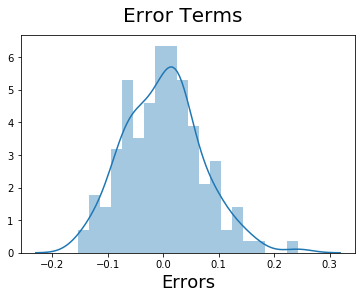

In [189]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

In [190]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
df_test.loc[:,'wheelbase':'price'] = scaler.transform(df_test.loc[:,'wheelbase':'price'])

df_test.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_d,aspiration_d,doornumber_d,enginelocation_d,company_audi,company_bmw,company_buick,company_chevrolet,company_dodge,company_honda,company_isuzu,company_jaguar,company_mazda,company_mercury,company_mitsubishi,company_nissan,company_peugeot,company_plymouth,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_volkswagen,company_volvo,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,carfuelsystem_2bbl,carfuelsystem_4bbl,carfuelsystem_idi,carfuelsystem_mfi,carfuelsystem_mpfi,carfuelsystem_spdi,carfuelsystem_spfi
160,0.313793,0.409756,0.341667,0.460177,0.235066,0.139623,0.404762,0.424242,0.12500,0.091667,0.265306,0.694444,0.810811,0.072382,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
186,0.368966,0.497561,0.433333,0.699115,0.305275,0.181132,0.404762,0.611111,0.12500,0.154167,0.448980,0.388889,0.459459,0.093295,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
59,0.420690,0.596748,0.516667,0.522124,0.347944,0.230189,0.563492,0.606061,0.10000,0.150000,0.265306,0.361111,0.405405,0.102964,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165,0.272414,0.448780,0.308333,0.424779,0.301396,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324,0.115479,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
140,0.231034,0.263415,0.291667,0.699115,0.291699,0.177358,0.746032,0.227273,0.10625,0.104167,0.102041,0.361111,0.378378,0.068652,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [191]:
df_test.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_d,aspiration_d,doornumber_d,enginelocation_d,company_audi,company_bmw,company_buick,company_chevrolet,company_dodge,company_honda,company_isuzu,company_jaguar,company_mazda,company_mercury,company_mitsubishi,company_nissan,company_peugeot,company_plymouth,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_volkswagen,company_volvo,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,carfuelsystem_2bbl,carfuelsystem_4bbl,carfuelsystem_idi,carfuelsystem_mfi,carfuelsystem_mpfi,carfuelsystem_spdi,carfuelsystem_spfi
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.0,62.0,62.0,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.437764,0.559481,0.480376,0.559663,0.428470,0.265673,0.556580,0.544314,0.209375,0.248858,0.393351,0.328405,0.363993,0.239439,0.887097,0.822581,0.435484,0.967742,0.032258,0.032258,0.048387,0.0,0.048387,0.064516,0.016129,0.0,0.064516,0.016129,0.064516,0.064516,0.048387,0.048387,0.032258,0.0,0.048387,0.016129,0.193548,0.080645,0.080645,0.145161,0.274194,0.177419,0.241935,0.145161,0.080645,0.338710,0.451613,0.096774,0.564516,0.419355,0.0,0.048387,0.806452,0.048387,0.064516,0.0,0.032258,0.854839,0.080645,0.0,0.0,0.0,0.258065,0.0,0.112903,0.016129,0.500000,0.048387,0.016129
std,0.212861,0.189947,0.165440,0.215811,0.179488,0.162820,0.228484,0.160738,0.273690,0.163376,0.192092,0.172009,0.181845,0.233076,0.319058,0.385142,0.499868,0.178127,0.178127,0.178127,0.216335,0.0,0.216335,0.247676,0.127000,0.0,0.247676,0.127000,0.247676,0.247676,0.216335,0.216335,0.178127,0.0,0.216335,0.127000,0.398304,0.274512,0.274512,0.355139,0.449749,0.385142,0.431751,0.355139,0.274512,0.477134,0.501716,0.298064,0.499868,0.497482,0.0,0.216335,0.398304,0.216335,0.247676,0.0,0.178127,0.355139,0.274512,0.0,0.0,0.0,0.441142,0.0,0.319058,0.127000,0.504082,0.216335,0.127000
min,0.000000,0.056911,0.183333,0.141593,0.128394,0.067925,-0.111111,-0.060606,0.000000,0.016667,0.000000,0.027778,-0.027027,0.007763,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.313793,0.459350,0.358333,0.384956,0.305275,0.177358,0.404762,0.484848,0.093750,0.107292,0.265306,0.166667,0.216216,0.092342,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.387931,

In [192]:
y_test = df_test.pop('price')
X_test = df_test
X.columns

Index(['carwidth', 'enginesize', 'enginelocation_d', 'company_bmw',
       'enginetype_rotor', 'cylindernumber_three'],
      dtype='object')

In [193]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[['carwidth', 'enginesize', 'enginelocation_d', 'company_bmw','cylindernumber_three', 'cylindernumber_two']]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [194]:
y_pred = lr_5.predict(X_test_new)
y_pred.head()
y_test.head()

160    0.072382
186    0.093295
59     0.102964
165    0.115479
140    0.068652
Name: price, dtype: float64

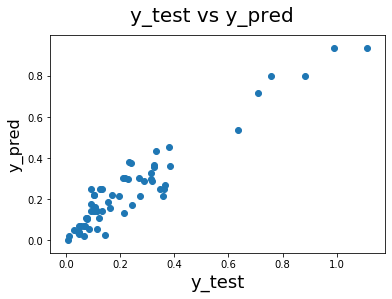

In [195]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

In [196]:
# Calculate R-squared score and RMSE on the test set
from sklearn.metrics import r2_score
print("R-Squared Score : {}".format(r2_score(y_test, y_pred)))
from sklearn.metrics import mean_squared_error
print("Root Mean Squared Error: {}".format(np.sqrt(mean_squared_error(y_test, y_pred))))

R-Squared Score : 0.9013443522816859
Root Mean Squared Error: 0.07261522038967093
